# NT1 - Data Oganizer for geotechnical data analysis and plotting

## Query Data Organizer for E, sigma_c, tau, then write to lists and show report tables 

In [2017]:
# open Data Organizer
from DataOrganizer import CouchbaseSelector
db = CouchbaseSelector('localhost','geotechnical')

In [2018]:
# set up python ecosystem
import json
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm
from scipy import stats

In [2019]:
# Notes:
# - To rerun analysis, best to choose Cell --> Run All
#   Rerunning an individual cell can give unexpected results. Unclear why                                 #ToDo JK

In [2020]:
# query Data Organizer records for 'parameter' = E 
# sorting by borehole_code and sample_depth

# initialize variables
data_E=[]

parameter = 'E'
fields = ['borehole_code','sample_description','lithology', 'sample_depth_top_m', 
          'value', 'value_unit', 'measurement_convention', 'test_type']
selector = {'project_code': 'NT1', 'data_source': 'Laboratory'}
sort = ['borehole_code','sample_depth_top_m']

# write rec to data_E if measurement_convention is E50 or is blank (assued to be E50)
# if value for E is blank, replace with 'NaN'    
for rec in db.get_parameter(parameter, fields, selector, sort):
    try:
      type(float(rec['value']))         
    except:
      rec['value'] = 'NaN'
    
    if rec['measurement_convention'] != 'Es':
      data_E.append(rec)

print('count for E: '+str(len(data_E)))    # record count for checking

count for E: 54


In [2021]:
# write returned Data Organizer list to a pandas data frame and display as html
data_E_df = pd.DataFrame(data=data_E)
data_E_df.columns = [u'Borehole', u'Lithology', u'Measurement', u'Depth', u'Sample', u'Test', u'Value', u'Unit']
display(HTML('<h4>NT1 data - E </h3>'))
display(HTML(data_E_df.to_html()))                                                             
##display(HTML(data_E_df.to_html(formatters={'value':lambda x: u'{:06.2f}'.format(float(x))})))
# order columns of report tables to something more suitable                                             #ToDo JK

,Borehole,Lithology,Measurement,Depth,Sample,Test,Value,Unit
0,NT1-1,Conglomerate,,27.10,Basic Design,E measured during uniaxial compression,3352.00,MPa
1,NT1-1,Conglomerate,,61.50,Basic Design,E measured during uniaxial compression,3532.00,MPa
2,NT1-11,Sandstone,,15.65,Basic Design,E measured during uniaxial compression,3142.00,MPa
3,NT1-14,Red Sandstone,E50,28.90,Construction Design,E measured during uniaxial compression,13200.00,MPa
4,NT1-14,Red Sandstone,E50,36.80,Construction Design,E measured during uniaxial compression,51400.00,MPa
5,NT1-14,Red Sandstone,E50,37.30,Construction Design,E measured during uniaxial compression,19700.00,MPa
6,NT1-14,Red Sandstone,E50,37.30,Construction Design,E measured during uniaxial compression,17800.00,MPa
7,NT1-14,Red Sandstone,E50,56.80,Construction Design,E measured during uniaxial compression,22100.00,MPa
8,NT1-15,Siltstone,E50,32.20,Construction Design,E measured during uniaxial compression,4170.00,MPa
9,NT1-15,Siltstone,E50,36.08,Construction Design,E measured during triaxial compression,6867.00,MPa


In [2022]:
# query Data Organizer records for 'parameter' = sigma_c
# sorting by borehole_code and sample_depth

# initialize variables
data_sigma_c=[]

parameter = 'sigma_c'
fields = ['borehole_code','sample_description','lithology', 'sample_depth_top_m', 
          'value', 'value_unit', 'test_parameters', 'test_type']
selector = {'project_code': 'NT1','data_source': 'Laboratory'}
sort = ['borehole_code','sample_depth_top_m']

# write selected fields to lists
# reduce 'test_parameter' to show only value of first parameter
for rec in db.get_parameter(parameter, fields, selector, sort):
    try:
      type(float(rec['value']))         
    except:
      rec['value'] = 'NaN'
    
    rec['test_parameters'] = rec['test_parameters'][0]['value']
    #print rec['test_parameters'][0]['value']

    data_sigma_c.append(rec)
    
print('count for sigma_c: '+str(len(data_sigma_c)))    # record count for checking

count for sigma_c: 60


In [2023]:
# write returned Data Organizer list to a pandas data frame and display as html
data_sigma_c_df = pd.DataFrame(data=data_sigma_c)
data_sigma_c_df.columns = [u'Borehole',u'Lithology',u'Depth',u'Sample',u's3',u'Test',u'Value',u'Unit']
display(HTML('<h4>NT1 data - sigma_c </h4>'))
display(HTML(data_sigma_c_df.to_html()))

,Borehole,Lithology,Depth,Sample,s3,Test,Value,Unit
0,NT1-1,Conglomerate,27.10,Basic Design,,Uniaxial compression,86.82,MPa
1,NT1-1,Conglomerate,61.50,Basic Design,,Uniaxial compression,75.15,MPa
2,NT1-11,Sandstone,15.65,Basic Design,,Uniaxial compression,85.02,MPa
3,NT1-14,Red Sandstone,28.90,Construction Design,3.00,Triaxial compression,127.17,MPa
4,NT1-14,Red Sandstone,28.90,Construction Design,5.00,Triaxial compression,128.55,MPa
5,NT1-14,Red Sandstone,28.90,Construction Design,,Uniaxial compression,56.01,MPa
6,NT1-14,Red Sandstone,28.90,Construction Design,1.00,Triaxial compression,90.54,MPa
7,NT1-14,Red Sandstone,36.80,Construction Design,,Uniaxial compression,106.68,MPa
8,NT1-14,Red Sandstone,37.30,Construction Design,,Uniaxial compression,78.68,MPa
9,NT1-14,Red Sandstone,37.30,Construction Design,,Uniaxial compression,126.68,MPa


In [2024]:
# query Data Organizer records for 'parameter' = tau
# sorting by borehole_code and sample_depth

# initialize variables
data_tau=[]

parameter = 'tau'
fields = ['borehole_code','sample_description','lithology', 'sample_depth_top_m', 
          'value', 'value_unit', 'measurement_convention', 'test_parameters', 'test_type']
selector = {'project_code': 'NT1','data_source': 'Laboratory'}
sort = ['borehole_code','sample_depth_top_m']

# write selected fields to lists
# reduce 'test_parameter' to show only value of first parameter
for rec in db.get_parameter(parameter, fields, selector, sort):
    try:
      type(float(rec['value']))         
    except:
      rec['value'] = 'NaN'
    
    rec['test_parameters'] = rec['test_parameters'][0]['value']  #Fix -should write to new key e.g. s3    #ToDo JK

    if rec['measurement_convention'] == 'Peak strength':  #tmp - should handled in plot data              #ToDo JK
      data_tau.append(rec)
    
print('count for tau: '+str(len(data_tau)))    # record count for checking

count for tau: 36


In [2025]:
# write returned Data Organizer list to a pandas data frame and display as html
data_tau_df = pd.DataFrame(data=data_tau)
data_tau_df.columns = [u'Borehole', u'Lithology', u'Measurement', u'Depth', u'Sample', u's3', u'Test', u'Value', u'Unit']
display(HTML('<h4>NT1 data - tau </h4>'))
display(HTML(data_tau_df.to_html()))

,Borehole,Lithology,Measurement,Depth,Sample,s3,Test,Value,Unit
0,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.40,Direct shear,0.20,MPa
1,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.80,Direct shear,0.34,MPa
2,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.40,Direct shear,0.18,MPa
3,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.20,Direct shear,0.14,MPa
4,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.80,Direct shear,0.37,MPa
5,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.80,Direct shear,0.37,MPa
6,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.20,Direct shear,0.11,MPa
7,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.80,Direct shear,0.41,MPa
8,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.20,Direct shear,0.07,MPa
9,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.20,Direct shear,0.14,MPa


## Plot histograms for E50 data

In [2026]:
# prepare E values for histogram 
# input: data_E

data_E_sel=[]

# select testing results from Basic Design
for item in data_E:
    if (item['value']) != 'NaN':
        if (item['sample_description']) == 'Basic Design':
            data_E_sel.append(float(item['value']))
    
print('count for selected E: '+str(len(data_E_sel)))    # record count for checking

count for selected E: 21


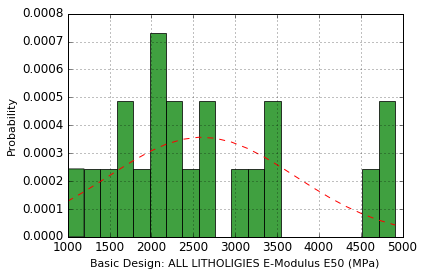

mean = 2603
standard deviation = 1117


In [2027]:
# plot histogram of all E50 values
# input: data_e containing 'values' of 'parameter' E

# input: E containing 'values' of 'parameter' E
E = data_E_sel

# plot histogram of E values for all rock lithologies
#   plt.hist(values, number of bins, additional named parameters)
hist,bin_edges,patches = plt.hist(E, 20, normed=1, facecolor='green', alpha=0.75)

# just guessing at distribution
#mu, sigma = 15000, 10000
#y = mlab.normpdf( bin_edges, mu, sigma)
#l = plt.plot(bin_edges, y, 'b--', linewidth=1)

# calculate distribution of E values using scipy
param = norm.fit(E) 
# now, param[0] and param[1] are the mean and the standard deviation of the fitted distribution
y = mlab.normpdf( bin_edges, param[0], param[1])
ll = plt.plot(bin_edges, y, 'r--', linewidth=1)

# plot axis labels and grid
plt.ylabel('Probability',fontsize=11)
plt.xlabel('Basic Design: ALL LITHOLIGIES E-Modulus E50 (MPa)',fontsize=11)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)  
plt.grid(True)
plt.show()

print('mean = '+str(format(param[0],'.0f')))
print('standard deviation = '+str(format(param[1],'.0f')))

In [2028]:
# prepare E values for histogram 
# input: data_E

data_E_sel=[]

# select testing results from Construction Design
for item in data_E:
  if (item['value']) != 'NaN':
    if (item['sample_description']) == 'Construction Design':
      data_E_sel.append(float(item['value']))
    
print('count for selected E: '+str(len(data_E_sel)))    # record count for checking

count for selected E: 29


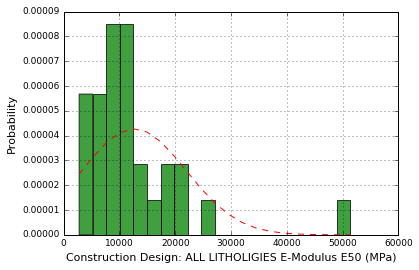

mean = 12629
standard deviation = 9334


In [2029]:
# plot histogram of all E50 values
# input: data_e containing 'values' of 'parameter' E

# input: E containing 'values' of 'parameter' E
E = data_E_sel

# plot histogram of E values for all rock lithologies
#   plt.hist(values, number of bins, additional named parameters)
hist,bin_edges,patches = plt.hist(E, 20, normed=1, facecolor='green', alpha=0.75)

# just guessing at distribution
#mu, sigma = 15000, 10000
#y = mlab.normpdf( bin_edges, mu, sigma)
#l = plt.plot(bin_edges, y, 'b--', linewidth=1)

# calculate distribution of E values using scipy
param = norm.fit(E) 
# now, param[0] and param[1] are the mean and the standard deviation of the fitted distribution
y = mlab.normpdf( bin_edges, param[0], param[1])
ll = plt.plot(bin_edges, y, 'r--', linewidth=1)

# plot axis labels and grid
plt.ylabel('Probability',fontsize=11)
plt.xlabel('Construction Design: ALL LITHOLIGIES E-Modulus E50 (MPa)',fontsize=11)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)  

plt.grid(True)
plt.show()

print('mean = '+str(format(param[0],'.0f')))
print('standard deviation = '+str(format(param[1],'.0f')))

In [2030]:
# prepare E values for selected lithologies 
# input: data_E

dict_E_basic={}
dict_E_const={}

def select_by_lithology(data, lithology, dict, sample_description):
  dict[lithology]=[]

  # select testing results from Construction Design
  for item in data:
    if (item['value']) != 'NaN':
      if (item['sample_description']) == sample_description:
        if (item['lithology']) == lithology:
            dict[lithology].append(float(item['value']))
        
select_by_lithology(data_E, 'Red Sandstone', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Sandstone', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Siltstone', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Mudstone', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Conglomerate', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Clay', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Sheared Mudstone', dict_E_const, 'Construction Design')

select_by_lithology(data_E, 'Red Sandstone', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Sandstone', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Siltstone', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Mudstone', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Conglomerate', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Clay', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Sheared Mudstone', dict_E_basic, 'Basic Design')

#print(dict_E_const)
#print(dict_E_basic)

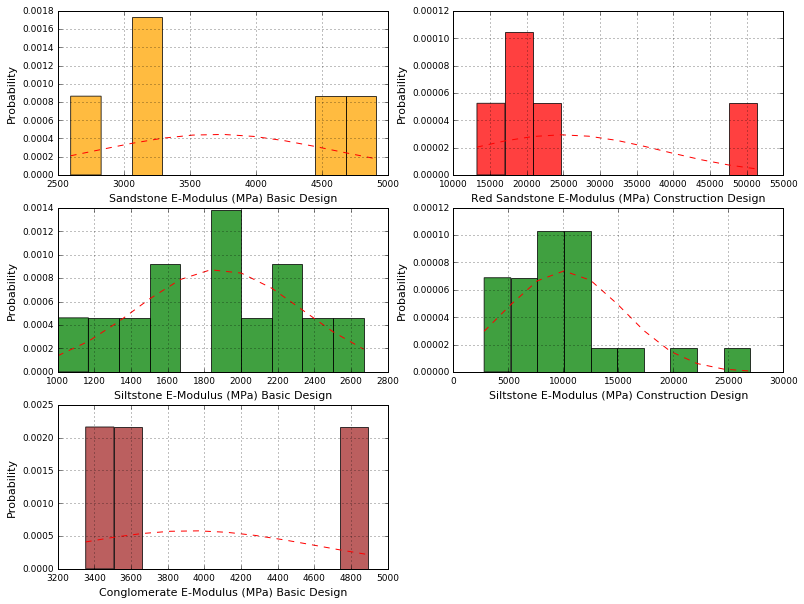

In [2031]:
# plot histogram of all E values for selected lithologies 
# input: dict_E_const and dict_E_basic containing 'values' of 'parameter' E 

# define dict for lithology colors
colors={'Red Sandstone':'red', 'Sandstone':'orange', 'Siltstone':'green', 'Conglomerate':'brown', 
        'Mudstone':'yellow' , 'Sheared Mudstone':'magenta', 'Clay':'black'}

def histogram_by_lithology(dict, lithology, sample_description):
  # plot histogram for values of selected lithology
  n, bins, patches = plt.hist(dict[lithology], 10, normed=1, facecolor=colors[lithology], alpha=0.75)

  # plot fitted distribution of data using scipy
  param = norm.fit(dict[lithology]) 
  y = mlab.normpdf( bins, param[0], param[1])
  plt.plot(bins, y, 'r--', linewidth=1)

  plt.ylabel('Probability',fontsize=11)
  plt.xlabel(lithology+' E-Modulus (MPa) '+sample_description,fontsize=11)
  plt.rc('xtick', labelsize=9)
  plt.rc('ytick', labelsize=9)  
  #plt.xlim((0,60000))
  plt.grid(True)
  #plt.text(0.08,0.98, '$\mu$='+str(format(param[0],'.0f')), fontsize=12, transform=ax.transAxes)
  #plt.text(0.08,0.90, '$\sigma$='+str(format(param[1],'.0f')), fontsize=12, transform=ax.transAxes)
  #plt.text(0.08,0.82, str(len(dict[lithology]))+' samples', fontsize=12, transform=ax.transAxes)
    
plt.figure(figsize=(13, 10))
plt.subplot(322)
histogram_by_lithology(dict_E_const, 'Red Sandstone', 'Construction Design')
plt.subplot(324)
histogram_by_lithology(dict_E_const, 'Siltstone', 'Construction Design')
plt.subplot(321)
histogram_by_lithology(dict_E_basic, 'Sandstone', 'Basic Design')
plt.subplot(323)
histogram_by_lithology(dict_E_basic, 'Siltstone', 'Basic Design')
plt.subplot(325)
histogram_by_lithology(dict_E_basic, 'Conglomerate', 'Basic Design')
plt.show()

In [2032]:
# prepare sigma_c (uniaxial compression) values for a selected lithologies
# input: data_sigma_c

dict_sigma_c_basic={}
dict_sigma_c_const={}

# select sigma_c data from uniaxial compression testing
data_sigma_c_sel=[]

# select testing results for Uniaxial compression
for item in data_sigma_c:
    if (item['test_type']) == 'Uniaxial compression':
        data_sigma_c_sel.append(item)
print(len(data_sigma_c_sel))

select_by_lithology(data_sigma_c_sel, 'Red Sandstone', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Sandstone', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Siltstone', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Mudstone', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Conglomerate', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Clay', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Sheared Mudstone', dict_sigma_c_const, 'Construction Design')

select_by_lithology(data_sigma_c_sel, 'Red Sandstone', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Sandstone', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Siltstone', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Mudstone', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Conglomerate', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Clay', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Sheared Mudstone', dict_sigma_c_basic, 'Basic Design')

print(dict_sigma_c_const)
print(dict_sigma_c_basic)
print(len(dict_sigma_c_const['Red Sandstone']))
print(len(dict_sigma_c_const['Siltstone']))
print(len(dict_sigma_c_basic['Sandstone']))
print(len(dict_sigma_c_basic['Siltstone']))
print(len(dict_sigma_c_basic['Conglomerate']))

39
{'Sheared Mudstone': [], 'Sandstone': [], 'Red Sandstone': [56.01, 106.68, 78.68, 126.68, 105.35], 'Siltstone': [20.67, 22.04, 19.98, 36.06, 19.29, 8.46, 9.77, 28.93, 28.93, 47.41, 45.9, 50.75, 46.33, 40.88, 39.38, 56.97, 24.67, 19.13, 15.3], 'Conglomerate': [], 'Mudstone': [], 'Clay': []}
{'Sheared Mudstone': [], 'Sandstone': [85.02, 83.3, 56.94, 58.69, 122.15, 118.97], 'Red Sandstone': [], 'Siltstone': [44.02, 53.64, 19.97, 29.78, 7.0, 25.6], 'Conglomerate': [86.82, 75.15, 113.55], 'Mudstone': [], 'Clay': []}
5
19
6
6
3


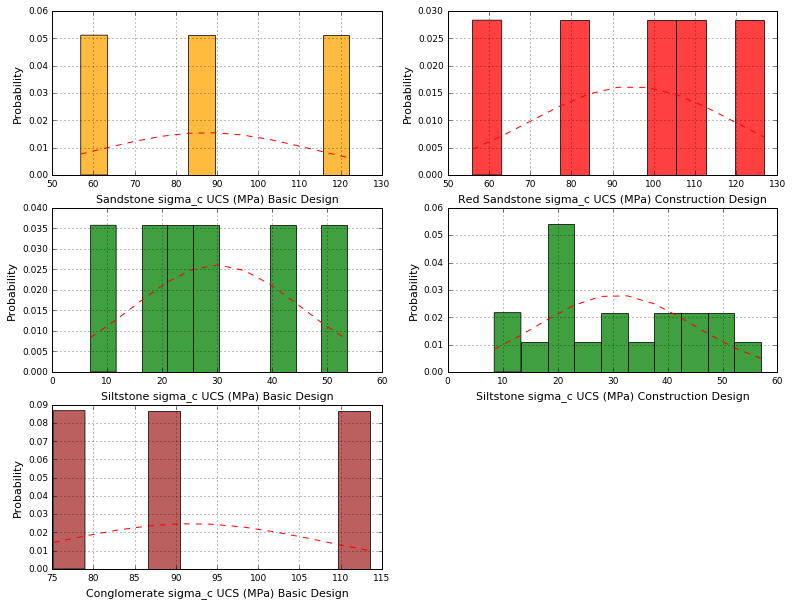

In [2033]:
# plot histogram of all sigma_c values for selected lithologies 
# input: dict_sigma_c_const, dict_sigma_c_basic containing 'values' of 'parameter' sigma_c

def histogram_by_lithology(dict, lithology, sample_description):
  # plot histogram for values of selected lithology
  # consider using two vertical axes, one for PDF and one (count) for histograms                          #ToDo JK
  n, bins, patches = plt.hist(dict[lithology], 10, normed=1, facecolor=colors[lithology], alpha=0.75)

  # plot fitted distribution of data using scipy
  param = norm.fit(dict[lithology]) 
  y = mlab.normpdf( bins, param[0], param[1])
  plt.plot(bins, y, 'r--', linewidth=1)

  plt.ylabel('Probability',fontsize=11)
  plt.xlabel(lithology+' sigma_c UCS (MPa) '+sample_description,fontsize=11)
  plt.rc('xtick', labelsize=9)
  plt.rc('ytick', labelsize=9)  
  plt.grid(True)
    
plt.figure(figsize=(13, 10))
plt.subplot(322)
histogram_by_lithology(dict_sigma_c_const, 'Red Sandstone', 'Construction Design')
plt.subplot(324)
histogram_by_lithology(dict_sigma_c_const, 'Siltstone', 'Construction Design')
plt.subplot(321)
histogram_by_lithology(dict_sigma_c_basic, 'Sandstone', 'Basic Design')
plt.subplot(323)
histogram_by_lithology(dict_sigma_c_basic, 'Siltstone', 'Basic Design')
plt.subplot(325)
histogram_by_lithology(dict_sigma_c_basic, 'Conglomerate', 'Basic Design')
plt.show()

## p-q plot for sigma_c and tau data

In [2034]:
# select sigma_c (uniaxial and triaxial compression) and tau (direct shear) values for selected lithologies
# sample_desciption is used to store construction phase (phase hould be added to parameter metadata)       #ToDo JK 

tests={'ucs':data_sigma_c,'tx':data_sigma_c,'ds':data_tau}  #test types and input data for each test type
test_names={'ucs':'Uniaxial compression','tx':'Triaxial compression','ds':'Direct shear'}  #for selecting test_type
lithologies=('Red Sandstone','Sandstone','Siltstone','Conglomerate','Mudstone','Sheared Mudstone','Clay')
sig1_const = {'ucs': {}, 'tx': {}, 'ds': {}}; sig3_const = {'ucs': {}, 'tx': {}, 'ds': {}}  #dictionaries
sig1_basic = {'ucs': {}, 'tx': {}, 'ds': {}}; sig3_basic = {'ucs': {}, 'tx': {}, 'ds': {}}  #dictionaries
# Should all these not have to be in call to function?                                                     #ToDo JK

# select strength data from test results and write to dictionary
def selected_stengths(sample_description, sig1, sig3):
    for key,value in tests.items():  #loop over test types (=key)
        for lithology in lithologies:
            sig1[key][lithology]=[]  #initialize dictionary
            sig3[key][lithology]=[]  #initialize dictionary
        for rec in value:  #for each record of input data
            if (rec['test_type']) == test_names[key]: #select for test type 
                if (rec['value']) != 'NaN':  #ignore NaN values
                    if (rec['sample_description']) == sample_description:  #select for phase
                        for lithology in lithologies:  # select for lithology
                            if (rec['lithology']) == lithology:
                                sig1[key][lithology].append(float(rec['value']))
                                try: 
                                    float(rec['test_parameters']) 
                                    sig3[key][lithology].append(float(rec['test_parameters']))
                                except:
                                    sig3[key][lithology].append(float(0))  #set 'test_parameter' = 0 if missing
                                
selected_stengths('Construction Design', sig1_const, sig3_const) 
selected_stengths('Basic Design', sig1_basic, sig3_basic)            

def count_selected_stengths(sig1,description):  #counts for data checking
    for item in sig1: 
        count=0
        for lithology,value in sig1[item].items():
            item_len = len(sig1[item][lithology])
            count = count + item_len
            if item_len > 1:
                print(description+':   count for selected '+str(item)+' in '+str(lithology)+': '+str(item_len))
        print (description+': count for selected '+str(item)+': '+str(count)) 

count_selected_stengths(sig1_const,'Construction Design')
count_selected_stengths(sig1_basic,'Basic Design')

#print sig1_const['ucs']['Siltstone']
#print sig1_const['tx']
#print sig3_const['tx']

Construction Design:   count for selected ucs in Red Sandstone: 5
Construction Design:   count for selected ucs in Siltstone: 19
Construction Design: count for selected ucs: 24
Construction Design:   count for selected ds in Sheared Mudstone: 12
Construction Design:   count for selected ds in Sandstone: 6
Construction Design:   count for selected ds in Siltstone: 12
Construction Design:   count for selected ds in Clay: 6
Construction Design: count for selected ds: 36
Construction Design:   count for selected tx in Red Sandstone: 6
Construction Design:   count for selected tx in Siltstone: 6
Construction Design: count for selected tx: 12
Basic Design:   count for selected ucs in Sandstone: 6
Basic Design:   count for selected ucs in Siltstone: 6
Basic Design:   count for selected ucs in Conglomerate: 3
Basic Design: count for selected ucs: 15
Basic Design: count for selected ds: 0
Basic Design:   count for selected tx in Siltstone: 9
Basic Design: count for selected tx: 9


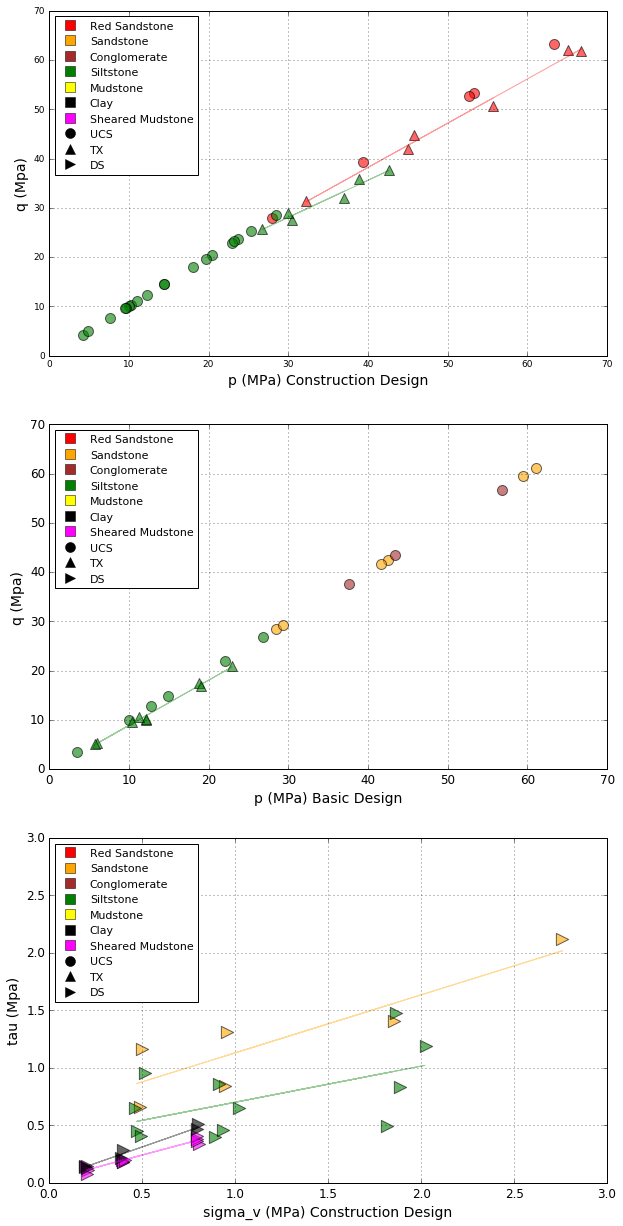

In [2035]:
# p-q plot for sigma_c and tau data for all rock lithologies                                          
# show different plots for basic and construction design                                                    ToDo JK
# input: sig1..., sig3... containing 'values' of 'parameter' and 'test_parameters'

markers={'ucs':'o', 'tx':'^', 'ds':'>'} 

def legend():    
# legend
    sym1 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="red")
    sym2 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="orange")
    sym3 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="brown")
    sym4 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="green")
    sym5 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="yellow")
    sym6 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="black")
    sym7 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="magenta")
    sym10 = Line2D([0], [0], linestyle="none", marker="o", alpha=1.0, markersize=10, color="black")
    sym11 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, markersize=10, color="black")
    sym12 = Line2D([0], [0], linestyle="none", marker=">", alpha=1.0, markersize=10, color="black")
    plt.legend((sym1,sym2,sym3,sym4,sym5,sym6,sym7,sym10,sym11,sym12),
           ("Red Sandstone","Sandstone","Conglomerate","Siltstone","Mudstone","Clay","Sheared Mudstone",
            "UCS","TX","DS"),fontsize=11, numpoints=1,loc="upper left")

def rand_jitter(arr):
    if not arr.any():
        pass
    else:
        stdev = .01*(max(arr)-min(arr))
        return arr + np.random.randn(len(arr)) * stdev

def pq_plot(sig1, sig3, lithology, test, sample_description):
# p-q plot for values of selected lithology
    sig1_ = np.array(sig1[lithology])
    sig3_ = np.array(sig3[lithology])
    line=(); s1=(); s3=()
    intercept=0.; slope=0.; std_err=0.
    if test=='ucs' or test=='tx':
        plt.scatter(((sig1_ + sig3_)/2.),((sig1_ - sig3_)/2.),
                    marker=markers[test],s= 100.,facecolor=colors[lithology],alpha=0.6)
        if sig1_.any() and test=='tx':  #mv test for any above plt.scatter?                               #ToDo JK
            s1=(sig1_ + sig3_)/2.
            s3=(sig1_ - sig3_)/2.
            slope, intercept, r_value, p_value, std_err = stats.linregress(s1,s3)
            line = slope*s1+intercept
        plt.plot(s1,line, color=colors[lithology],alpha=0.4)
        #print(test+':  '+lithology+'  '+'intercept: '+str(intercept)+'  slope: '+str(slope)+'  error: '+str(std_err))

    if test=='ds':
        plt.scatter(rand_jitter(sig3_),rand_jitter(sig1_),
                    marker=markers[test],s= 150.,facecolor=colors[lithology],alpha=0.6)
        if not sig1_.any():  #if no data for lithology  --> mv this above plt.scatter                      #ToDo JK
            pass
        else:
            slope, intercept, r_value, p_value, std_err = stats.linregress(sig3_,sig1_)
            line = slope*sig3_+intercept
        plt.plot(sig3_,line, color=colors[lithology],alpha=0.4)
        #print(test+':  '+lithology+'  '+'intercept: '+str(intercept)+'  slope: '+str(slope)+'  error: '+str(std_err))

    plt.ylabel('q (Mpa)',fontsize=14)
    plt.xlabel('p (MPa) '+sample_description,fontsize=14)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.grid(True)

plt.figure(figsize=(10, 21))

plt.subplot(311)
plt.xlim((0,70))
plt.ylim((0,70))
for lithology in lithologies:
    pq_plot(sig1_const['ucs'], sig3_const['ucs'],lithology,'ucs','Construction Design')
for lithology in lithologies:
    pq_plot(sig1_const['tx'], sig3_const['tx'],lithology,'tx','Construction Design')
legend()

plt.subplot(313)
plt.xlim((0,3))
plt.ylim((0,3))
for lithology in lithologies:
    pq_plot(sig1_const['ds'], sig3_const['ds'],lithology,'ds','Construction Design') 
plt.ylabel('tau (Mpa)',fontsize=14)
plt.xlabel('sigma_v (MPa) Construction Design',fontsize=14)
legend()    

plt.subplot(312)
plt.xlim((0,70))
plt.ylim((0,70))
for lithology in lithologies:
    pq_plot(sig1_basic['ucs'], sig3_basic['ucs'],lithology,'ucs','Basic Design')
for lithology in lithologies:
    pq_plot(sig1_basic['tx'], sig3_basic['tx'],lithology,'tx','Basic Design')
legend()

plt.show()

## Scatterplot of E50 vs sigma_c data

In [2036]:
# remove records for sigma_c if no record for E at the sample_depth, for scatterplot
# note: it is not yet checked if there are E values with no record for sigma_c at the sample_depth
# input: data_sigma_c

data_sigma_c_adj=[]  # adjusted lists
data_E_adj=[]
data_sigma_c_adj_loc=[]
data_E_adj_loc=[]

i=0

for item in data_sigma_c:
    if item['test_type'] == 'Uniaxial compression':
        data_sigma_c_adj.append(item)
        data_sigma_c_adj_loc.append((item['borehole_code'],item['sample_depth_top_m']))
for item in data_E:
    if item['test_type'] == 'E measured during uniaxial compression':
        data_E_adj.append(item)
        data_E_adj_loc.append((item['borehole_code'],item['sample_depth_top_m']))
        
        
test = set(data_sigma_c_adj_loc).intersection(data_E_adj_loc)  #unique pairs of intersection of lists
        
        

#for item in nem_data_sigma_c:
##for item in data_sigma_c:
    # check if a record exists with an E value at the sample_depth of the item
    # and append to the adjusted list if record exists 
    ##if any(d['sample_depth_top_m'] == (data_sigma_c[i]['sample_depth_top_m']) for d in data_E):
    ##    #print data_sigma_c[i]['borehole_code']
    ##    #add if test_type = 'Uniaxial compression' (and add similar adjustment for E)                 #ToDo  JK
    ##    data_sigma_c_adj.append(item)
    ##    i+=1
    ##else:
    ##    i=1+i
    ##    pass
    
#for i in range(len(data_sigma_c)):
#    print '-'
#    print data_sigma_c[i]['sample_depth_top_m'],data_E[i]['sample_depth_top_m']
#    print data_sigma_c[i]['sample_depth_top_m'] == data_E[i]['sample_depth_top_m']
#    if data_sigma_c[i]['sample_depth_top_m'] == data_E[i]['sample_depth_top_m']:
#        data_sigma_c_adj.append(data_sigma_c[i])
#        print 'if'+str(i), data_sigma_c[i]
#    else:
#        print 'else'+str(i)
    
print(len(data_sigma_c))
print(len(data_sigma_c_adj))
print(len(data_E))
print(len(data_E_adj))

60
39
54
39


In [2037]:
print data_sigma_c_adj_loc

[(u'NT1-1', u'27.10'), (u'NT1-1', u'61.50'), (u'NT1-11', u'15.65'), (u'NT1-14', u'28.90'), (u'NT1-14', u'36.80'), (u'NT1-14', u'37.30'), (u'NT1-14', u'37.30'), (u'NT1-14', u'56.80'), (u'NT1-15', u'32.20'), (u'NT1-18', u'23.50'), (u'NT1-18', u'23.50'), (u'NT1-19', u'63.60'), (u'NT1-19', u'63.60'), (u'NT1-2', u'22.12'), (u'NT1-21', u'61.00'), (u'NT1-21', u'61.00'), (u'NT1-21', u'66.90'), (u'NT1-21', u'66.90'), (u'NT1-4', u'11.00'), (u'NT1-5', u'24.25'), (u'NT1-5', u'64.70'), (u'NT1-5', u'82.91'), (u'NT1-6', u'39.25'), (u'NT1-6', u'52.10'), (u'NT1-6', u'58.80'), (u'NT1-8', u'134.70'), (u'NT1-9', u'94.38'), (u'NT1-A19', u''), (u'NT1-A21', u''), (u'NT1-A22', u''), (u'NT1-A24', u''), (u'NT1-A25', u''), (u'NT1-A6', u''), (u'NT1-A?', u''), (u'NT1-DL-01', u'20.60'), (u'NT1-DL-01', u'20.60'), (u'NT1-DL-01', u'22.40'), (u'NT1-LB-ExpAdit', u'22.00'), (u'NT1-LB-ExpAdit', u'22.00')]


In [2038]:
print data_E_adj_loc

[(u'NT1-1', u'27.10'), (u'NT1-1', u'61.50'), (u'NT1-11', u'15.65'), (u'NT1-14', u'28.90'), (u'NT1-14', u'36.80'), (u'NT1-14', u'37.30'), (u'NT1-14', u'37.30'), (u'NT1-14', u'56.80'), (u'NT1-15', u'32.20'), (u'NT1-18', u'23.50'), (u'NT1-18', u'23.50'), (u'NT1-19', u'63.60'), (u'NT1-19', u'63.60'), (u'NT1-2', u'22.12'), (u'NT1-21', u'61.00'), (u'NT1-21', u'61.00'), (u'NT1-21', u'66.90'), (u'NT1-21', u'66.90'), (u'NT1-4', u'11.00'), (u'NT1-5', u'24.25'), (u'NT1-5', u'64.70'), (u'NT1-5', u'82.91'), (u'NT1-6', u'39.25'), (u'NT1-6', u'52.10'), (u'NT1-6', u'58.80'), (u'NT1-8', u'134.70'), (u'NT1-9', u'94.38'), (u'NT1-A19', u''), (u'NT1-A21', u''), (u'NT1-A22', u''), (u'NT1-A24', u''), (u'NT1-A25', u''), (u'NT1-A6', u''), (u'NT1-A?', u''), (u'NT1-DL-01', u'20.60'), (u'NT1-DL-01', u'20.60'), (u'NT1-DL-01', u'22.40'), (u'NT1-LB-ExpAdit', u'22.00'), (u'NT1-LB-ExpAdit', u'22.00')]


In [2039]:
print test
print len(test)

set([(u'NT1-19', u'63.60'), (u'NT1-5', u'64.70'), (u'NT1-18', u'23.50'), (u'NT1-6', u'52.10'), (u'NT1-14', u'36.80'), (u'NT1-A22', u''), (u'NT1-5', u'24.25'), (u'NT1-LB-ExpAdit', u'22.00'), (u'NT1-5', u'82.91'), (u'NT1-DL-01', u'20.60'), (u'NT1-4', u'11.00'), (u'NT1-14', u'56.80'), (u'NT1-14', u'37.30'), (u'NT1-8', u'134.70'), (u'NT1-DL-01', u'22.40'), (u'NT1-A6', u''), (u'NT1-A24', u''), (u'NT1-1', u'61.50'), (u'NT1-6', u'58.80'), (u'NT1-A25', u''), (u'NT1-14', u'28.90'), (u'NT1-A?', u''), (u'NT1-21', u'66.90'), (u'NT1-2', u'22.12'), (u'NT1-11', u'15.65'), (u'NT1-1', u'27.10'), (u'NT1-9', u'94.38'), (u'NT1-21', u'61.00'), (u'NT1-A21', u''), (u'NT1-A19', u''), (u'NT1-6', u'39.25'), (u'NT1-15', u'32.20')])
32


In [2040]:
set(data_sigma_c_adj_loc).difference(data_E_adj_loc)

set()

In [2041]:
set(data_sigma_c_adj_loc) & set(data_E_adj_loc)
len(set(data_sigma_c_adj_loc) & set(data_E_adj_loc))

32

In [2042]:
[name for name in data_sigma_c_adj_loc if name in data_E_adj_loc]
len([name for name in data_sigma_c_adj_loc if name in data_E_adj_loc])

39

In [2043]:
sigma_c_list=[]
for item in data_sigma_c_adj:
    sigma_c_list.append((item['borehole_code'],item['sample_depth_top_m']))
sigma_E_list=[]
for item in data_E:
    sigma_E_list.append((item['borehole_code'],item['sample_depth_top_m']))
print len(sigma_c_list),len(sigma_E_list)
for i in range(99):
    try:
        print sigma_c_list[i],sigma_E_list[i]
    except:
        pass

39 54
(u'NT1-1', u'27.10') (u'NT1-1', u'27.10')
(u'NT1-1', u'61.50') (u'NT1-1', u'61.50')
(u'NT1-11', u'15.65') (u'NT1-11', u'15.65')
(u'NT1-14', u'28.90') (u'NT1-14', u'28.90')
(u'NT1-14', u'36.80') (u'NT1-14', u'36.80')
(u'NT1-14', u'37.30') (u'NT1-14', u'37.30')
(u'NT1-14', u'37.30') (u'NT1-14', u'37.30')
(u'NT1-14', u'56.80') (u'NT1-14', u'56.80')
(u'NT1-15', u'32.20') (u'NT1-15', u'32.20')
(u'NT1-18', u'23.50') (u'NT1-15', u'36.08')
(u'NT1-18', u'23.50') (u'NT1-15', u'36.08')
(u'NT1-19', u'63.60') (u'NT1-15', u'36.08')
(u'NT1-19', u'63.60') (u'NT1-18', u'23.50')
(u'NT1-2', u'22.12') (u'NT1-18', u'23.50')
(u'NT1-21', u'61.00') (u'NT1-19', u'58.60')
(u'NT1-21', u'61.00') (u'NT1-19', u'58.60')
(u'NT1-21', u'66.90') (u'NT1-19', u'58.60')
(u'NT1-21', u'66.90') (u'NT1-19', u'63.60')
(u'NT1-4', u'11.00') (u'NT1-19', u'63.60')
(u'NT1-5', u'24.25') (u'NT1-2', u'22.12')
(u'NT1-5', u'64.70') (u'NT1-21', u'61.00')
(u'NT1-5', u'82.91') (u'NT1-21', u'61.00')
(u'NT1-6', u'39.25') (u'NT1-21', u'6

In [2044]:
# data report
# input: data_sigma_c_adj

data_E_adj_df = pd.DataFrame(data=data_E_adj)

# display data_sigma_c_adj_df as html using pandas df.to_html()
display(HTML('<h4>Adjusted NT1 data - sigma_c </h4>'))
# CORRECT HEADERS!
data_E_adj_df.columns = [u'Borehole', u'Lithology', u'Depth', u'Sample', u's3', u'Test', u'Value', u'Unit']
display(HTML(data_E_adj_df.to_html()))

,Borehole,Lithology,Depth,Sample,s3,Test,Value,Unit
0,NT1-1,Conglomerate,,27.10,Basic Design,E measured during uniaxial compression,3352.00,MPa
1,NT1-1,Conglomerate,,61.50,Basic Design,E measured during uniaxial compression,3532.00,MPa
2,NT1-11,Sandstone,,15.65,Basic Design,E measured during uniaxial compression,3142.00,MPa
3,NT1-14,Red Sandstone,E50,28.90,Construction Design,E measured during uniaxial compression,13200.00,MPa
4,NT1-14,Red Sandstone,E50,36.80,Construction Design,E measured during uniaxial compression,51400.00,MPa
5,NT1-14,Red Sandstone,E50,37.30,Construction Design,E measured during uniaxial compression,19700.00,MPa
6,NT1-14,Red Sandstone,E50,37.30,Construction Design,E measured during uniaxial compression,17800.00,MPa
7,NT1-14,Red Sandstone,E50,56.80,Construction Design,E measured during uniaxial compression,22100.00,MPa
8,NT1-15,Siltstone,E50,32.20,Construction Design,E measured during uniaxial compression,4170.00,MPa
9,NT1-18,Siltstone,E50,23.50,Construction Design,E measured during uniaxial compression,6760.00,MPa


In [2045]:
print len(data_E_adj)
for i in range(len(data_E_adj)):
    print(data_sigma_c_adj[i]['borehole_code'],data_sigma_c_adj[i]['sample_depth_top_m'],
          float(data_E_adj[i]['value']), float(data_sigma_c_adj[i]['value']),
          '{0:.0f}'.format(float(data_E_adj[i]['value'])/float(data_sigma_c_adj[i]['value'])),
          data_E_adj[i]['sample_description'])
# SHOW AS HTML TABLE (use df)

39
(u'NT1-1', u'27.10', 3352.0, 86.82, '39', u'Basic Design')
(u'NT1-1', u'61.50', 3532.0, 75.15, '47', u'Basic Design')
(u'NT1-11', u'15.65', 3142.0, 85.02, '37', u'Basic Design')
(u'NT1-14', u'28.90', 13200.0, 56.01, '236', u'Construction Design')
(u'NT1-14', u'36.80', 51400.0, 106.68, '482', u'Construction Design')
(u'NT1-14', u'37.30', 19700.0, 78.68, '250', u'Construction Design')
(u'NT1-14', u'37.30', 17800.0, 126.68, '141', u'Construction Design')
(u'NT1-14', u'56.80', 22100.0, 105.35, '210', u'Construction Design')
(u'NT1-15', u'32.20', 4170.0, 20.67, '202', u'Construction Design')
(u'NT1-18', u'23.50', 6760.0, 22.04, '307', u'Construction Design')
(u'NT1-18', u'23.50', 2790.0, 19.98, '140', u'Construction Design')
(u'NT1-19', u'63.60', 11400.0, 36.06, '316', u'Construction Design')
(u'NT1-19', u'63.60', 20700.0, 19.29, '1073', u'Construction Design')
(u'NT1-2', u'22.12', 2017.0, 44.02, '46', u'Basic Design')
(u'NT1-21', u'61.00', 7780.0, 8.46, '920', u'Construction Design')
(u

Red Sandstone  intercept: 78.6496748636  slope: 0.000645343201949  error: 0.000977202185604
Siltstone  intercept: 29.4019812325  slope: 0.000148053947  error: 0.000588170738255
Sandstone  intercept: -19.8662446983  slope: 0.0292835384507  error: 0.006519656444
Siltstone  intercept: -5.94147895119  slope: 0.0213943151862  error: 0.0137015869259
Conglomerate  intercept: 7.7399767573  slope: 0.0214194812572  error: 0.0092536016139


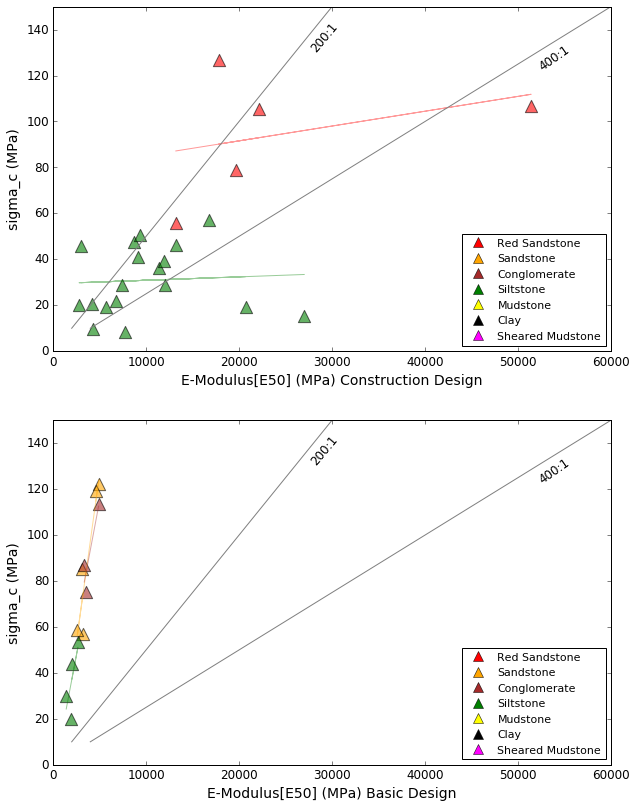

In [2060]:
# scatterplot of E50 against sigma_c for all rock lithologies
# input: data_E_adj, data_sigma_c_adj containing ordered 'values' of 'parameter' E and sigma_c,
#        ordering using 'borehole_code' and sample_depth_top_m
# prcocedure needs to be made robust, check that corrects ordered pairs are always plotted               #ToDo JK

# lithologies: defined above 
E={}
sigma_c={}

# select E, sgima_c data pairs and write to dictionary
# select for construction phase implies that E and sigma_c are both select, correct???                    #ToDo JK

def selected_pairs(sample_description):
    ##E={}
    ##sigma_c={}
    ###print E
    ###print sigma_c
    for lithology in lithologies:
        E[lithology]=[]  #initialize dictionary
        sigma_c[lithology]=[]  #initialize dictionary
    for i in range(len(data_E_adj)):
        if (data_E_adj[i]['value']) != 'NaN':  #ignore NaN values    
            if (data_E_adj[i]['sample_description']) == sample_description:  #select for phase
                ##print(sample_description,data_E_adj[i]['value'],data_sigma_c_adj[i]['value']) 
                for lithology in lithologies:  # select for lithology
                    if (data_E_adj[i]['lithology']) == lithology:
                        ##print(lithology,sample_description,data_E_adj[i]['value'],data_sigma_c_adj[i]['value']) 
                        if float(data_E_adj[i]['value']):  #this is only check for E, not sigma_c    #ToDo JK
                            E[lithology].append(float(data_E_adj[i]['value']))
                            sigma_c[lithology].append(float(data_sigma_c_adj[i]['value']))
                            ##print(lithology,sample_description,data_E_adj[i]['value'],data_sigma_c_adj[i]['value'])
    ###print E
    ###print sigma_c

def scatter_plot(E_, sigma_c_, lithology, sample_description):
    if E_.any():  # if E values are present for a selected lithology
        # scatterplot for values of selected lithology
        plt.scatter(E_,sigma_c_,
                    marker='^',s= 150.,facecolor=colors[lithology],alpha=0.6)
        #calculate linear regression
        line=(); s1=(); s3=(); intercept=0.; slope=0.; std_err=0.
        slope, intercept, r_value, p_value, std_err = stats.linregress(E_,sigma_c_)
        line = slope*E_+intercept
        plt.plot(E_,line, color=colors[lithology],alpha=0.4)
        print(lithology+'  '+'intercept: '+str(intercept)+'  slope: '+str(slope)+'  error: '+str(std_err))

def legend():    
# legend
    sym1 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, markersize=10, color="red")
    sym2 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, markersize=10, color="orange")
    sym3 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, markersize=10, color="brown")
    sym4 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, markersize=10, color="green")
    sym5 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, markersize=10, color="yellow")
    sym6 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, markersize=10, color="black")
    sym7 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, markersize=10, color="magenta")
    plt.legend((sym1,sym2,sym3,sym4,sym5,sym6,sym7,sym10,sym11,sym12),
           ("Red Sandstone","Sandstone","Conglomerate","Siltstone","Mudstone","Clay","Sheared Mudstone"),
             fontsize=11, numpoints=1,loc="lower right")

    
plt.figure(figsize=(10, 21))

plt.subplot(311)
selected_pairs('Construction Design')
###print(E)
###print(sigma_c)
for lithology in lithologies:
    scatter_plot(np.array(E[lithology]),np.array(sigma_c[lithology]),lithology,'Construction Design')
    
# show a reference trend line
plt.plot((2000,20000,40000,60000),(10,100,200,300), color="gray")
plt.annotate("200:1",xy=(27500,140),xytext=(27500,140),rotation=50,fontsize=12)
plt.plot((4000,40000,60000),(10,100,150), color="gray")
plt.annotate("400:1",xy=(52000,130),xytext=(52000,130),rotation=35,fontsize=12)

plt.xlim((0,60000))
plt.ylim((0,150))
plt.ylabel('sigma_c (MPa)',fontsize=14)
plt.xlabel('E-Modulus[E50] (MPa) Construction Design',fontsize=14)
legend()
# check plot values
#print E
#print sigma_c

plt.subplot(312)
selected_pairs('Basic Design')
for lithology in lithologies:
    scatter_plot(np.array(E[lithology]),np.array(sigma_c[lithology]),lithology,'Basic Design')
    
# show a reference trend line
plt.plot((2000,20000,40000,60000),(10,100,200,300), color="gray")
plt.annotate("200:1",xy=(27500,140),xytext=(27500,140),rotation=50,fontsize=12)
plt.plot((4000,40000,60000),(10,100,150), color="gray")
plt.annotate("400:1",xy=(52000,130),xytext=(52000,130),rotation=35,fontsize=12)

plt.xlim((0,60000))
plt.ylim((0,150))
plt.ylabel('sigma_c (MPa)',fontsize=14)
plt.xlabel('E-Modulus[E50] (MPa) Basic Design',fontsize=14)
legend()
# check plot values
#print E
#print sigma_c

plt.show()

In [2064]:
print E
print sigma_c

{'Sheared Mudstone': [], 'Sandstone': [3142.0, 3232.0, 2597.0, 4913.0, 4594.0], 'Red Sandstone': [], 'Siltstone': [2017.0, 2669.0, 1902.0, 1413.0], 'Conglomerate': [3352.0, 3532.0, 4895.0], 'Mudstone': [], 'Clay': []}
{'Sheared Mudstone': [], 'Sandstone': [85.02, 56.94, 58.69, 122.15, 118.97], 'Red Sandstone': [], 'Siltstone': [44.02, 53.64, 19.97, 29.78], 'Conglomerate': [86.82, 75.15, 113.55], 'Mudstone': [], 'Clay': []}


In [2065]:
selected_pairs('Basic Design')
print E
print sigma_c

{'Sheared Mudstone': [], 'Sandstone': [3142.0, 3232.0, 2597.0, 4913.0, 4594.0], 'Red Sandstone': [], 'Siltstone': [2017.0, 2669.0, 1902.0, 1413.0], 'Conglomerate': [3352.0, 3532.0, 4895.0], 'Mudstone': [], 'Clay': []}
{'Sheared Mudstone': [], 'Sandstone': [85.02, 56.94, 58.69, 122.15, 118.97], 'Red Sandstone': [], 'Siltstone': [44.02, 53.64, 19.97, 29.78], 'Conglomerate': [86.82, 75.15, 113.55], 'Mudstone': [], 'Clay': []}


In [2066]:
selected_pairs('Construction Design')
print E
print sigma_c

{'Sheared Mudstone': [], 'Sandstone': [], 'Red Sandstone': [13200.0, 51400.0, 19700.0, 17800.0, 22100.0], 'Siltstone': [4170.0, 6760.0, 2790.0, 11400.0, 20700.0, 7780.0, 4290.0, 12000.0, 7450.0, 8680.0, 2980.0, 9300.0, 13200.0, 9140.0, 11900.0, 16800.0, 5650.0, 27000.0], 'Conglomerate': [], 'Mudstone': [], 'Clay': []}
{'Sheared Mudstone': [], 'Sandstone': [], 'Red Sandstone': [56.01, 106.68, 78.68, 126.68, 105.35], 'Siltstone': [20.67, 22.04, 19.98, 36.06, 19.29, 8.46, 9.77, 28.93, 28.93, 47.41, 45.9, 50.75, 46.33, 40.88, 39.38, 56.97, 19.13, 15.3], 'Conglomerate': [], 'Mudstone': [], 'Clay': []}
